# Данные по инсультам

Выведем информацию о столбцах датасета:

In [83]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

random_state=9

df = pd.read_csv("..//..//static//csv//healthcare-dataset-stroke-data.csv", index_col="id")

df

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  Female  44.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban              83.75   NaN     never smoked       0  
44873          Urban             125.20  40.0     never smoked       0  
19723          Rural              82.99  30.6     never smoked       0  
37544          Rural             166.29  25.6  formerly smoked       0  
44679          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

## Бизнес-цели

### Классификация

Цель: разработать модель классификации, которая сможет предсказать возможность возникновения инсульта у человека на основе социально-демографических факторов, состояния здоровья и образа жизни.

Применение:

1. Медицинские учреждения: модель может использоваться для раннего выявления пациентов с высоким риском инсульта, что позволит предпринять профилактические меры и уменьшить вероятность серьезных последствий.
2. Системы поддержки принятия медицинских решений: модель может быть встроена в электронные медицинские карты для автоматического предупреждения врачей о пациентах, находящихся в зоне повышенного риска.
3. Образовательные программы: модель может помочь повысить осведомленность населения о факторах риска инсульта и способах их снижения, что также может улучшить профилактику заболеваний.

### Регрессия

Цель: разработать модель регрессии для прогнозирования уровня глюкозы в крови человека на основе социально-демографических факторов, состояния здоровья и образа жизни. Модель позволит определить тенденцию к повышению или снижению уровня глюкозы и, в дальнейшем, оценить возможные риски, связанные с состоянием пациента.

Применение:

1. Медицинские учреждения: помощь в раннем выявлении пациентов с потенциально высоким уровнем глюкозы для контроля и назначения профилактических мер, снижающих риск диабета и других осложнений.
2. Системы поддержки принятия медицинских решений: интеграция модели в медицинские записи позволит врачам получать оценку уровня глюкозы, что упростит мониторинг и ведение пациентов, особенно при отсутствии лабораторных данных в реальном времени.
3. Образовательные программы и общественное здравоохранение: с помощью модели можно повысить осведомленность населения о факторах, влияющих на уровень глюкозы, и предлагать рекомендации по улучшению образа жизни для поддержания нормального уровня глюкозы.

## Достижимый уровень качества модели

Модель классификации для предсказания инсульта на основе этого набора данных может достигнуть хорошего качества, но с некоторыми ограничениями. 

- Информативные признаки: Датасет содержит признаки, которые являются важными факторами риска инсульта (например, возраст, наличие гипертонии и сердечных заболеваний). Эти данные, скорее всего, дают модели достаточно информации для распознавания группы повышенного риска.

- Ограничения данных: Несмотря на наличие ключевых медицинских факторов, датасет не включает генетические данные, специфическую историю заболеваний или детализированные данные о питании и физической активности, которые также влияют на риск инсульта. Это может ограничить максимальное качество модели.

Для задачи регрессии по предсказанию уровня глюкозы в крови модель может также достигнуть хорошего качества с ограниченной точностью.

- Информативность признаков: Данные содержат признаки, которые связаны с уровнем глюкозы (например, возраст, курение, наличие гипертонии), и их можно использовать для создания прогноза на общем уровне.

- Недостающие факторы: Уровень глюкозы сильно зависит от питания, уровня физической активности, гормональных изменений, которые не представлены в данных. Из-за этого модель будет иметь ограниченную точность при оценке этого параметра.

## Классификация

Разделим набор данных на на обучающую и тестовые выборки (80/20). Целевой признак - stroke

In [84]:
from typing import Tuple
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

In [85]:
X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="stroke", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
22159  Female  54.0             1              0           No        Private   
8920   Female  51.0             0              0          Yes  Self-employed   
65507    Male  33.0             0              0          Yes        Private   
43196  Female  52.0             0              0          Yes  Self-employed   
59745  Female  27.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
66546  Female  20.0             0              0           No        Private   
68798  Female  58.0             0              0          Yes        Private   
61409    Male  32.0             1              0           No       Govt_job   
69259  Female  77.0             0              0          Yes        Private   
17231  Female  24.0             0              0           No        Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
22159          Urban              97.06  28.5  formerly smoked       0  
8920           Rural              76.35  33.5  formerly smoked       0  
65507          Rural              55.72  38.2     never smoked       0  
43196          Urban              59.54  42.2          Unknown       0  
59745          Urban              76.74  53.9          Unknown       0  
...              ...                ...   ...              ...     ...  
66546          Urban              80.08  25.1     never smoked       0  
68798          Rural              59.86  28.0  formerly smoked       1  
61409          Urban              58.24   NaN  formerly smoked       0  
69259          Rural             100.85  29.5           smokes       0  
17231          Urban              90.42  24.3     never smoked       0  

[4088 rows x 11 columns]

'y_train'

stroke
id           
22159       0
8920        0
65507       0
43196       0
59745       0
...       ...
66546       0
68798       1
61409       0
69259       0
17231       0

[4088 rows x 1 columns]

'X_test'

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
18072  Female  39.0             0              0          Yes       Govt_job   
67063    Male  62.0             0              0          Yes  Self-employed   
40387  Female  17.0             0              0           No        Private   
18032    Male  62.0             0              1          Yes        Private   
5478   Female  60.0             0              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
57710  Female  50.0             0              0          Yes        Private   
63043  Female  27.0             0              0           No        Private   
63986    Male  60.0             0              0          Yes        Private   
28461    Male  15.0             0              0           No   Never_worked   
54975    Male   7.0             0              0           No  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
18072          Urban             107.47  21.3          Unknown       0  
67063          Urban             130.56  36.1          Unknown       0  
40387          Rural              77.46  24.0          Unknown       0  
18032          Rural              90.61  25.8           smokes       0  
5478           Urban             203.04   NaN           smokes       0  
...              ...                ...   ...              ...     ...  
57710          Rural             112.25  21.6          Unknown       0  
63043          Urban              61.80  26.8  formerly smoked       0  
63986          Rural             153.48  37.3     never smoked       0  
28461          Rural              79.59  28.4          Unknown       0  
54975          Rural              64.06  18.9          Unknown       0  

[1022 rows x 11 columns]

'y_test'

stroke
id           
18072       0
67063       0
40387       0
18032       0
5478        0
...       ...
57710       0
63043       0
63986       0
28461       0
54975       0

[1022 rows x 1 columns]

Выберем ориентир для задачи классификации. Для этого применим алгоритм случайного предсказания, т.е. в каждом случае в качестве предсказания выберем случайный класс.

In [86]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Получаем уникальные классы для целевого признака из тренировочного набора данных
unique_classes = np.unique(y_train)

# Генерируем случайные предсказания, выбирая случайное значение из области значений целевого признака
random_predictions = np.random.choice(unique_classes, size=len(y_test))

# Вычисление метрик для ориентира
baseline_accuracy = accuracy_score(y_test, random_predictions)
baseline_precision = precision_score(y_test, random_predictions)
baseline_recall = recall_score(y_test, random_predictions)
baseline_f1 = f1_score(y_test, random_predictions)

print('Baseline Accuracy:', baseline_accuracy)
print('Baseline Precision:', baseline_precision)
print('Baseline Recall:', baseline_recall)
print('Baseline F1 Score:', baseline_f1)

Baseline Accuracy: 0.5205479452054794
Baseline Precision: 0.05823293172690763
Baseline Recall: 0.58
Baseline F1 Score: 0.10583941605839416


Были использованы следующие метрики:

- Accuracy: показывает долю верных предсказаний из общего числа примеров. Интуитивно понятная, но практически бесполезная в задачах с неравными классами метрика, т.к. не показывает насколько эффективно модель предсказывает более редкий класс.
- Precision: доля истинно положительных примеров среди всех предсказанных положительных. Precision показывает, насколько модель избирательна при предсказании положительного класса. Это важно, если ложные срабатывания нежелательны (например, ошибочное предсказание инсульта).
- Recall: доля объектов положительного класса из всех объектов положительного класса, которую нашел алгоритм. Recall показывает способность модели распознавать все примеры положительного класса. В рассматриваемой задаче высокое значение recall важно, так как минимизирует пропуски случаев инсульта.
- F1 Score: гармоническое среднее precision и recall, балансирует их значения. Эта метрика важна, если нам необходимо учитывать как точность, так и полноту модели. F1-score особенно полезен, если классы несбалансированы и важно найти баланс между обнаружением всех случаев (recall) и минимизацией ложных срабатываний (precision).

Можно увидеть, что данные метрики охватывают разные аспекты работы модели, от способности распознавать редкие классы до общего уровня точности, что позволяет взглянуть на работу модели с разных сторон.

## Сформируем конвейер для классификации

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

columns_to_drop = ["work_type", "stroke"]
columns_not_to_modify = ["hypertension", "heart_disease"]

num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop
    and column not in columns_not_to_modify
    and df[column].dtype != "object"
]

cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop
    and column not in columns_not_to_modify
    and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

Теперь проверим работу конвейера:

In [88]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

age  avg_glucose_level       bmi  gender_Male  gender_Other  \
id                                                                        
22159  0.472344          -0.194427 -0.059214          0.0           0.0   
8920   0.339807          -0.653763  0.587887          0.0           0.0   
65507 -0.455418          -1.111325  1.196162          1.0           0.0   
43196  0.383986          -1.026600  1.713843          0.0           0.0   
59745 -0.720492          -0.645113  3.228060          0.0           0.0   
...         ...                ...       ...          ...           ...   
66546 -1.029746          -0.571034 -0.499243          0.0           0.0   
68798  0.649060          -1.019502 -0.123924          0.0           0.0   
61409 -0.499597          -1.055433 -0.098040          1.0           0.0   
69259  1.488464          -0.110367  0.070206          0.0           0.0   
17231 -0.853030          -0.341699 -0.602779          0.0           0.0   

       ever_married_Yes  Residence_type_Urban  smoking_status_formerly smoked  \
id                                                                              
22159               0.0                   1.0                             1.0   
8920                1.0                   0.0                             1.0   
65507               1.0                   0.0                             0.0   
43196               1.0                   1.0                             0.0   
59745               1.0                   1.0                             0.0   
...                 ...                   ...                             ...   
66546               0.0                   1.0                             0.0   
68798               1.0                   0.0                             1.0   
61409               0.0                   1.0                             1.0   
69259               1.0                   0.0                             0.0   
17231               0.0                   1.0                             0.0   

       smoking_status_never smoked  smoking_status_smokes  hypertension  \
id                                                                        
22159                          0.0                    0.0             1   
8920                           0.0                    0.0             0   
65507                          1.0                    0.0             0   
43196                          0.0                    0.0             0   
59745                          0.0                    0.0             0   
...                            ...                    ...           ...   
66546                          1.0                    0.0             0   
68798                          0.0                    0.0             0   
61409                          0.0                    0.0             1   
69259                          0.0                    1.0             0   
17231                          1.0                    0.0             0   

       heart_disease  
id                    
22159              0  
8920               0  
65507              0  
43196              0  
59745              0  
...              ...  
66546              0  
68798              0  
61409              0  
69259              0  
17231              0  

[4088 rows x 12 columns]

Подберем оптимальные гиперпараметры для каждой из выбранных моделей методом поиска по сетке и сформируем их набор.

knn -- k-ближайших соседей

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, ensemble, neural_network

# Словарь с вариантами гиперпараметров для каждой модели
param_grids = {
    "knn": {
        "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
        "weights": ['uniform', 'distance']
    },
    "random_forest": {
        "n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
        "max_features": ["sqrt", "log2", 2],
        "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "criterion": ["gini", "entropy", "log_loss"],
        "random_state": [random_state],
        "class_weight": ["balanced", "balanced_subsample"]
    },
    "mlp": {
        "solver": ['adam'], 
        "max_iter": [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 
        "alpha": 10.0 ** -np.arange(1, 10), 
        "hidden_layer_sizes":np.arange(10, 15), 
        "early_stopping": [True, False],
        "random_state": [random_state]
    }
}

# Создаем экземпляры моделей
models = {
    "knn": neighbors.KNeighborsClassifier(),
    "random_forest": ensemble.RandomForestClassifier(),
    "mlp": neural_network.MLPClassifier()
}

# Словарь для хранения моделей с их лучшими параметрами
class_models = {}

# Выполнение поиска по сетке для каждой модели
for model_name, model in models.items():
    # Создаем GridSearchCV для текущей модели
    gs_optimizer = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring="f1", n_jobs=-1)
    
    # Обучаем GridSearchCV
    gs_optimizer.fit(preprocessed_df, y_train.values.ravel())
    
    # Получаем лучшие параметры
    best_params = gs_optimizer.best_params_
    print(f"Лучшие параметры для {model_name}: {best_params}")
    
    class_models[model_name] = {
        "model": model.set_params(**best_params)  # Настраиваем модель с лучшими параметрами
    }

Лучшие параметры для knn: {'n_neighbors': 1, 'weights': 'uniform'}
Лучшие параметры для random_forest: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 9}
Лучшие параметры для mlp: {'alpha': np.float64(0.1), 'early_stopping': True, 'hidden_layer_sizes': np.int64(14), 'max_iter': 1000, 'random_state': 9, 'solver': 'adam'}


Далее обучим модели и оценим их качество.

In [90]:
from sklearn.metrics import confusion_matrix

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = accuracy_score(
        y_test, y_test_predict
    ) 
    class_models[model_name]["F1_train"] = f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = f1_score(y_test, y_test_predict)
    class_models[model_name]["Confusion_matrix"] = confusion_matrix(
        y_test, y_test_predict
    )

Model: knn
Model: random_forest
Model: mlp


Матрицы неточностей:

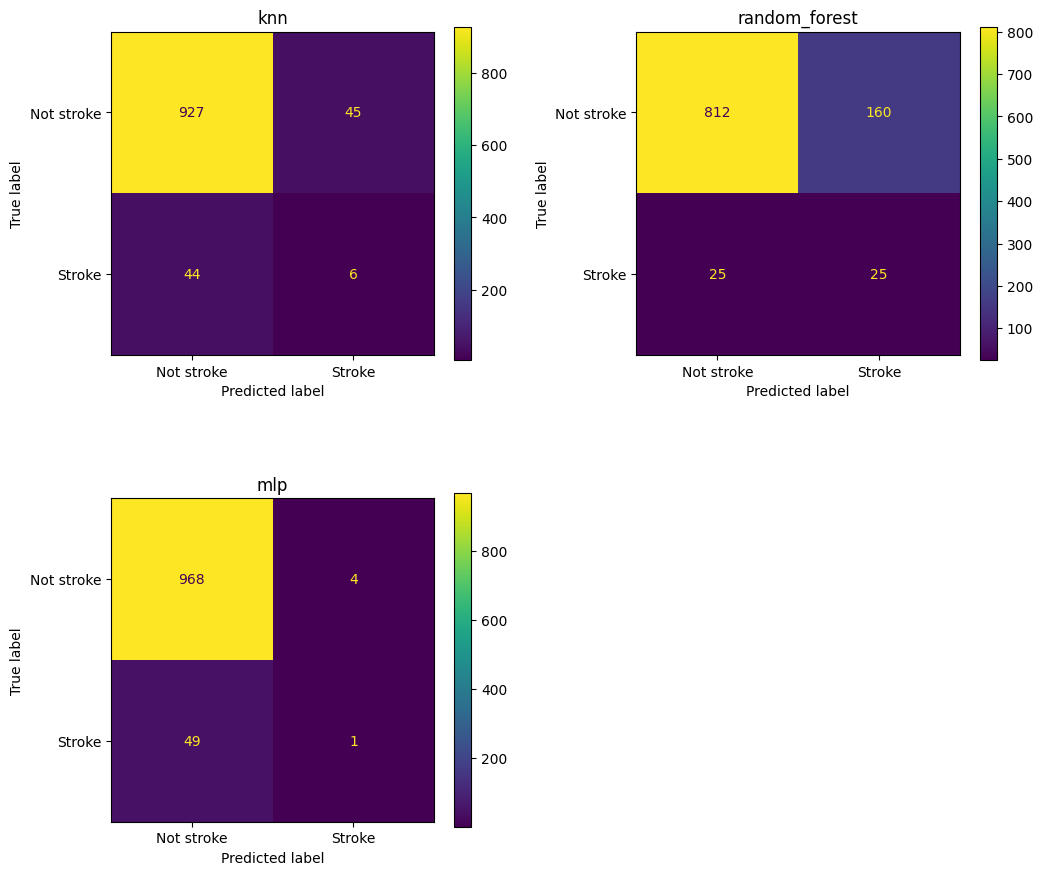

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for index, (key, model_info) in enumerate(class_models.items()):
    c_matrix = model_info["Confusion_matrix"]
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Not stroke", "Stroke"]
    ).plot(ax=ax.flat[index])
    
    disp.ax_.set_title(key)

if len(class_models) < len(ax.flat):
    for i in range(len(class_models), len(ax.flat)):
        fig.delaxes(ax.flat[i])

plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.3)

plt.show()

Precision, Recall, Accuracy, F1:

In [92]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Краткий анализ метрик:

1. MLP (многослойный перцептрон)

    Precision (точность) на обучении: 0.40, на тесте: 0.20

    Recall (полнота) на обучении: 0.02, на тесте: 0.02

    Accuracy (точность) на обучении: 0.95, на тесте: 0.95

    F1-метрика на обучении: 0.038, на тесте: 0.037

    Вывод: высокая точность на обучении и тесте указывает на хорошую способность модели правильно определять общий класс. Однако низкие значения precision, recall и F1-метрики говорят о сильном смещении: модель плохо справляется с выявлением положительных примеров.

2. KNN (Метод K-ближайших соседей)

    Precision на обучении: 1.0, на тесте: 0.118

    Recall на обучении: 1.0, на тесте: 0.12

    Accuracy на обучении: 1.0, на тесте: 0.91

    F1-метрика на обучении: 1.0, на тесте: 0.119

    Вывод: модель показывает явное переобучение. Она идеально предсказывает на обучающем наборе, но значительно теряет точность на тестовых данных.

3. Random Forest (Случайный лес)

    Precision на обучении: 0.229, на тесте: 0.135

    Recall на обучении: 0.88, на тесте: 0.50

    Accuracy на обучении: 0.85, на тесте: 0.82

    F1-метрика на обучении: 0.364, на тесте: 0.213

    Вывод: модель по сравнению с остальными вариантами показывает сбалансированные значения метрик, но их сложно назвать хорошими. Так, precision остается достаточно низким, что указывает на необходимость улучшения способности к идентификации положительных примеров.

Сравнение с ориентиром.

- Baseline Accuracy: 0.52
- Baseline Precision: 0.058
- Baseline Recall: 0.58
- Baseline F1 Score: 0.106

Accuracy: все модели (особенно MLP и KNN) значительно превосходят базовую модель по точности. Random Forest также превосходит базовую модель, но не так явно.

Precision: все модели лучше, чем базовая модель, хотя точность остается низкой. Особенно низкие значения у KNN и Random Forest.

Recall: базовая модель показывает лучший recall, чем MLP и KNN. Это указывает на то, что обе модели (особенно MLP) с трудом находят положительные примеры. Random Forest лучше справляется с этой задачей.

F1 Score: Random Forest показывает наилучшую F1-метрику, указывая на баланс между precision и recall, но она все еще значительно ниже желаемого уровня.

Выводы о смещении и дисперсии:

MLP: модель сильно смещена, поскольку плохо распознает положительные примеры, несмотря на высокую общую точность.

KNN: высокая дисперсия, модель сильно переобучена на обучающем наборе и плохо обобщает на тестовом.

Random Forest: наиболее сбалансированная модель с умеренным смещением и дисперсией. Она показывает лучший баланс между precision и recall, хотя precision остается невысоким.

Заключение:

Самой качественной моделью в данном случае можно назвать Random Forest, так как она показывает лучший баланс между различными метриками, но при этом и данная модель далека от идеала.

## Регрессия

Разделим набор данных на на обучающую и тестовые выборки (80/20). Целевой признак - avg_glucose_level

In [93]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status', 'stroke']
target = 'avg_glucose_level'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=random_state)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
13276  Female  38.0             0              0          Yes        Private   
21346  Female  12.0             0              0           No       children   
59178  Female   7.0             0              0           No       children   
1679     Male  35.0             0              0          Yes        Private   
1534   Female  61.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
30463    Male  29.0             0              0           No        Private   
41935    Male  34.0             0              0           No        Private   
68483  Female  60.0             0              0          Yes        Private   
38617    Male  28.0             0              0          Yes  Self-employed   
46527    Male  53.0             1              1          Yes       Govt_job   

      Residence_type   bmi   smoking_status  stroke  
id                                                   
13276          Urban  22.6          Unknown       0  
21346          Rural  17.8          Unknown       0  
59178          Urban  22.3          Unknown       0  
1679           Rural   NaN  formerly smoked       0  
1534           Rural  26.1           smokes       0  
...              ...   ...              ...     ...  
30463          Urban  29.4  formerly smoked       0  
41935          Rural  33.9     never smoked       0  
68483          Urban  41.2  formerly smoked       0  
38617          Urban  29.9     never smoked       0  
46527          Rural  41.9     never smoked       0  

[4088 rows x 10 columns]

'y_train'

id
13276     71.06
21346     70.13
59178     86.75
1679      77.48
1534      99.35
          ...  
30463     82.93
41935    125.29
68483     65.38
38617     73.98
46527    109.51
Name: avg_glucose_level, Length: 4088, dtype: float64

'X_test'

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
8385     Male  37.0             0              0          Yes        Private   
937      Male   7.0             0              0           No       children   
3494   Female  80.0             0              0          Yes        Private   
23850    Male  66.0             0              0          Yes        Private   
31156  Female  49.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
71010  Female  80.0             0              0           No  Self-employed   
39518  Female  20.0             0              0           No        Private   
7780     Male  51.0             0              0          Yes  Self-employed   
56137  Female  62.0             0              0          Yes        Private   
33175  Female  57.0             0              0          Yes       Govt_job   

      Residence_type   bmi smoking_status  stroke  
id                                                 
8385           Urban  35.9        Unknown       0  
937            Urban   NaN        Unknown       0  
3494           Rural  26.7        Unknown       0  
23850          Urban  33.1   never smoked       0  
31156          Urban  29.8   never smoked       0  
...              ...   ...            ...     ...  
71010          Urban  22.8   never smoked       0  
39518          Rural  20.7   never smoked       0  
7780           Urban  30.7   never smoked       0  
56137          Urban  36.3        Unknown       0  
33175          Urban  28.5        Unknown       1  

[1022 rows x 10 columns]

'y_test'

id
8385      90.78
937       87.94
3494     102.90
23850    103.01
31156    105.99
          ...  
71010     57.57
39518     78.94
7780      75.73
56137     88.32
33175    110.52
Name: avg_glucose_level, Length: 1022, dtype: float64

Выберем ориентир для задачи регрессии. Для этого применим алгоритм правила нуля, т.е. в каждом случае в качестве предсказания выберем среднее значение из области значений целевого признака.

In [94]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Базовое предсказание: среднее значение по y_train
baseline_predictions = [y_train.mean()] * len(y_test)

# Вычисление метрик качества для ориентира
baseline_rmse = math.sqrt(
        mean_squared_error(y_test, baseline_predictions)
    )
baseline_rmae = math.sqrt(
        mean_absolute_error(y_test, baseline_predictions)
    )
baseline_r2 = r2_score(y_test, baseline_predictions)

print('Baseline RMSE:', baseline_rmse)
print('Baseline RMAE:', baseline_rmae)
print('Baseline R2:', baseline_r2)

Baseline RMSE: 44.12711275645952
Baseline RMAE: 5.662154850745081
Baseline R2: -0.0010729515309222393


Были использованы следующие метрики:

- RMSE: корень из MSE. MSE (Mean Squared Error) — среднеквадратическая ошибка, квадрат отклонения между предсказанными и истинными значениями. MSE чувствительна к большим ошибкам, так как отклонения возводятся в квадрат. RMSE также штрафует за большие ошибки, но в отличие от MSE, масштаб ошибки аналогичен исходным данным, что облегчает интерпретацию. Это делает RMSE хорошим выбором для многих практических задач, где важна интерпретируемость результата.
- RMAE: корень из MAE. MAE (Mean Absolute Error) — средняя абсолютная ошибка. Она показывает среднее отклонение предсказаний от истинных значений. MAE менее чувствительна к выбросам по сравнению с MSE и RMSE. Это делает её предпочтительным вариантом, когда выбросы присутствуют в данных, но не должны сильно влиять на общую производительность модели.
- R2 (коэффициент детерминации) : R2 измеряет, какая доля вариативности зависимой переменной объясняется независимыми переменными в модели. Это хороший способ оценить адекватность модели: близость к 1 говорит о хорошем объяснении данных моделью. R2 лучше всего подходит для сравнения моделей с одинаковыми данными.

Таким образом, результаты этих метрик для базового ориентира позволят оценить, насколько лучше (или хуже) модель по сравнению с простым предсказанием среднего значения.

## Сформируем конвейер для регрессии

In [95]:
columns_to_drop = []
columns_not_to_modify = ["hypertension", "heart_disease", "stroke", "avg_glucose_level"]

num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop
    and column not in columns_not_to_modify
    and df[column].dtype != "object"
]

cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop
    and column not in columns_not_to_modify
    and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

pipeline_end_reg = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

Теперь проверим работу конвейера:

In [96]:
preprocessing_result = pipeline_end_reg.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end_reg.get_feature_names_out(),
)

preprocessed_df

age       bmi  gender_Male  gender_Other  ever_married_Yes  \
id                                                                       
13276 -0.236211 -0.826056          0.0           0.0               1.0   
21346 -1.386874 -1.455413          0.0           0.0               0.0   
59178 -1.608155 -0.865391          0.0           0.0               0.0   
1679  -0.368980 -0.104918          1.0           0.0               1.0   
1534   0.781682 -0.367150          0.0           0.0               1.0   
...         ...       ...          ...           ...               ...   
30463 -0.634518  0.065532          1.0           0.0               0.0   
41935 -0.413236  0.655554          1.0           0.0               0.0   
68483  0.737426  1.612701          0.0           0.0               1.0   
38617 -0.678774  0.131090          1.0           0.0               1.0   
46527  0.427632  1.704482          1.0           0.0               1.0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
13276                     0.0                1.0                      0.0   
21346                     0.0                0.0                      0.0   
59178                     0.0                0.0                      0.0   
1679                      0.0                1.0                      0.0   
1534                      0.0                1.0                      0.0   
...                       ...                ...                      ...   
30463                     0.0                1.0                      0.0   
41935                     0.0                1.0                      0.0   
68483                     0.0                1.0                      0.0   
38617                     0.0                0.0                      1.0   
46527                     0.0                0.0                      0.0   

       work_type_children  Residence_type_Urban  \
id                                                
13276                 0.0                   1.0   
21346                 1.0                   0.0   
59178                 1.0                   1.0   
1679                  0.0                   0.0   
1534                  0.0                   0.0   
...                   ...                   ...   
30463                 0.0                   1.0   
41935                 0.0                   0.0   
68483                 0.0                   1.0   
38617                 0.0                   1.0   
46527                 0.0                   0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
13276                             0.0                          0.0   
21346                             0.0                          0.0   
59178                             0.0                          0.0   
1679                              1.0                          0.0   
1534                              0.0                          0.0   
...                               ...                          ...   
30463                             1.0                          0.0   
41935                             0.0                          1.0   
68483                             1.0                          0.0   
38617                             0.0                          1.0   
46527                             0.0                          1.0   

       smoking_status_smokes  hypertension  heart_disease  stroke  
id                                                                 
13276                    0.0             0              0       0  
21346                    0.0             0              0       0  
59178                    0.0             0              0       0  
1679                     0.0             0              0       0  
1534                     1.0             0              0       

Подберем оптимальные гиперпараметры для каждой из выбранных моделей методом поиска по сетке и сформируем их набор.

knn -- k-ближайших соседей

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [ ]:
# Словарь с вариантами гиперпараметров для каждой модели
param_grids = {
    "knn": {
        "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
        "weights": ['uniform', 'distance'],
        "n_jobs": [-1]
    },
    "random_forest": {
        "n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
        "max_features": ["sqrt", "log2", 2],
        "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "criterion": ["squared_error", "absolute_error", "poisson"],
        "random_state": [random_state],
        "n_jobs": [-1]
    },
    "mlp": {
        "solver": ['adam'], 
        "max_iter": [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 
        "alpha": 10.0 ** -np.arange(1, 10), 
        "hidden_layer_sizes":np.arange(10, 15), 
        "early_stopping": [True, False],
        "random_state": [random_state]
    }
}

# Создаем экземпляры моделей
models = {
    "knn": neighbors.KNeighborsRegressor(),
    "random_forest": ensemble.RandomForestRegressor(),
    "mlp": neural_network.MLPRegressor()
}

# Словарь для хранения моделей с их лучшими параметрами
class_models = {}

# Выполнение поиска по сетке для каждой модели
for model_name, model in models.items():
    # Создаем GridSearchCV для текущей модели
    gs_optimizer = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Обучаем GridSearchCV
    gs_optimizer.fit(preprocessed_df, y_train.values.ravel())
    
    # Получаем лучшие параметры
    best_params = gs_optimizer.best_params_
    print(f"Лучшие параметры для {model_name}: {best_params}")
    
    class_models[model_name] = {
        "model": model.set_params(**best_params)  # Настраиваем модель с лучшими параметрами
    }

Лучшие параметры для knn: {'n_jobs': -1, 'n_neighbors': 30, 'weights': 'uniform'}
Лучшие параметры для random_forest: {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 250, 'n_jobs': -1, 'random_state': 9}
Лучшие параметры для mlp: {'alpha': np.float64(1e-06), 'early_stopping': False, 'hidden_layer_sizes': np.int64(13), 'max_iter': 1000, 'random_state': 9, 'solver': 'adam'}


Далее обучим модели и оценим их качество.

In [98]:
for model_name in class_models.keys():
    print(f"Model: {model_name}")
    
    model = class_models[model_name]["model"]
    model_pipeline = Pipeline([("pipeline", pipeline_end_reg), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["train_preds"] = y_train_pred
    class_models[model_name]["preds"] = y_test_pred
    
    class_models[model_name]["RMSE_train"] = math.sqrt(
        mean_squared_error(y_train, y_train_pred)
    )
    class_models[model_name]["RMSE_test"] = math.sqrt(
        mean_squared_error(y_test, y_test_pred)
    )
    class_models[model_name]["RMAE_test"] = math.sqrt(
        mean_absolute_error(y_test, y_test_pred)
    )
    class_models[model_name]["R2_test"] = r2_score(y_test, y_test_pred)

Model: knn
Model: random_forest
Model: mlp


RMSE, RMAE, R2:

In [99]:
reg_metrics = pd.DataFrame.from_dict(class_models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

Результаты графиками:

Model: knn


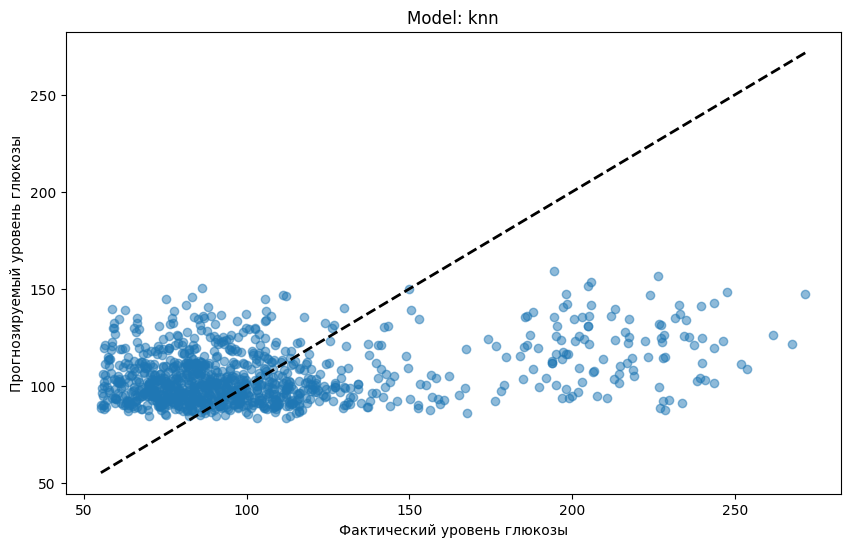

Model: random_forest


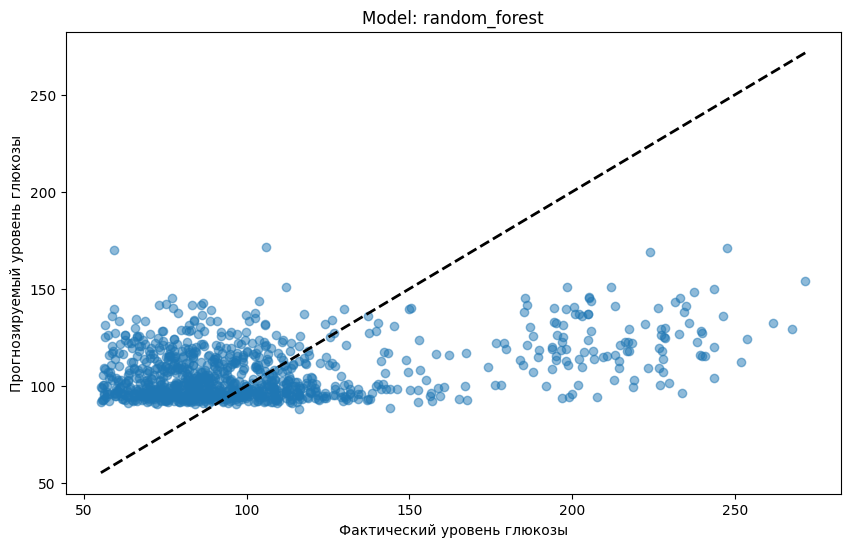

Model: mlp


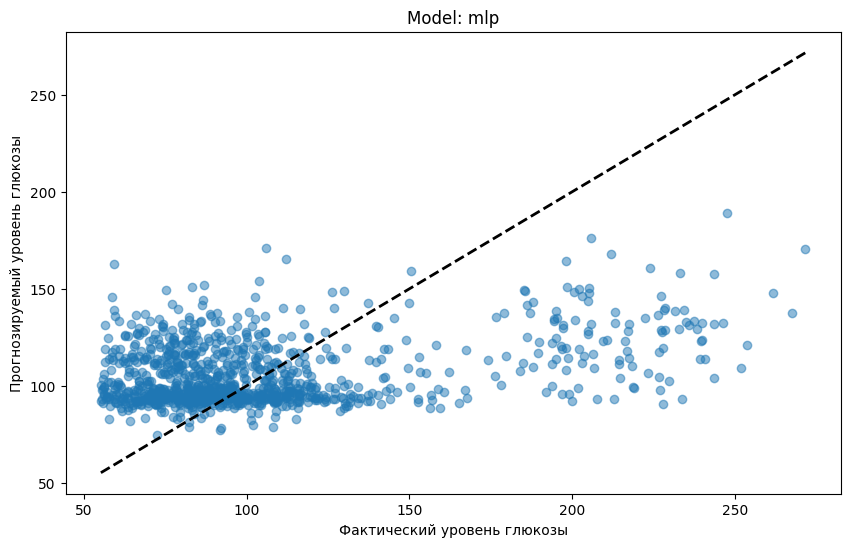

In [100]:
# Создаем графики для всех моделей
for model_name, model_data in class_models.items():
    print(f"Model: {model_name}")
    y_pred = model_data["preds"]
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Фактический уровень глюкозы')
    plt.ylabel('Прогнозируемый уровень глюкозы')
    plt.title(f"Model: {model_name}")
    plt.show()

На представленных графиках можно заметить, что модели в целом не демонстрируют высокого качества. Визуализация их предсказаний показывает сильное рассеивание вокруг идеальной линии y = x, что указывает на значительные отклонения предсказаний от фактических значений.

Тем не менее ориентир, хоть возможно и не столь значительно, каждая из моделей превосходит по всем показателям. Особенно заметное улучшение в 
R2, которая переходит из отрицательного значения в положительное, что говорит о том, что модели хотя бы частично объясняют дисперсию данных. 

Кроме того, можно сказать, что все модели имеет умеренную дисперсию и не сильно подвержены переобучению, потому что разница между RMSE на обучении и тесте незначительна.

Итоговые выводы:
- Наиболее качественная модель: MLP, так как она показывает наименьшее значение RMSE и наибольшее значение R2, что указывает на лучшую точность и объяснение дисперсии целевой переменной.

- Random Forest: Близок по производительности к MLP, с чуть большим RMSE, но является более устойчивой моделью с небольшими отклонениями между обучением и тестом.

- KNN: Худшая модель, демонстрирующая наибольшие ошибки и низкое R2, что указывает на необходимость улучшения или использования другой модели для данной задачи.